In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('Data/raw.csv')

In [3]:
data.head(2)

,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,showers,snowfall,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,year,month,day,hour
0,2022-01-01,11.0215,93.0,8.542295,0.0,0.0,0.0,0.0,1019.9,1018.79724,7.0,16.981165,212.00534,51.12,0.0,2022,1,1,0
1,2022-01-01,10.5215,95.0,8.323380,0.0,0.0,0.0,0.0,1019.7,1018.59550,19.0,14.707222,201.54105,43.56,0.0,2022,1,1,1


In [4]:
len(data.index)

24840

In [5]:
data.duplicated().sum()

np.int64(0)

#### Visualizing Temporal Trends

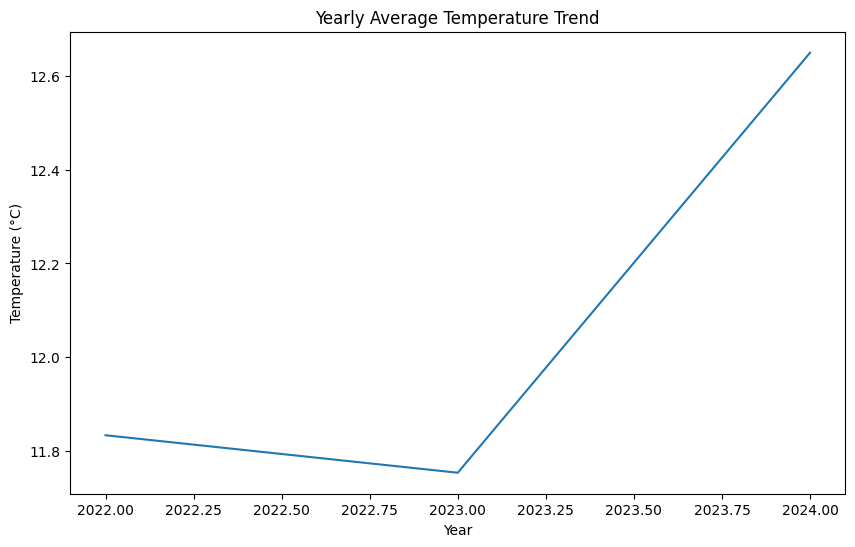

In [6]:
# Example: Plot temperature trends
plt.figure(figsize=(10, 6))
data.groupby('year')['temperature_2m'].mean().plot()
plt.title("Yearly Average Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

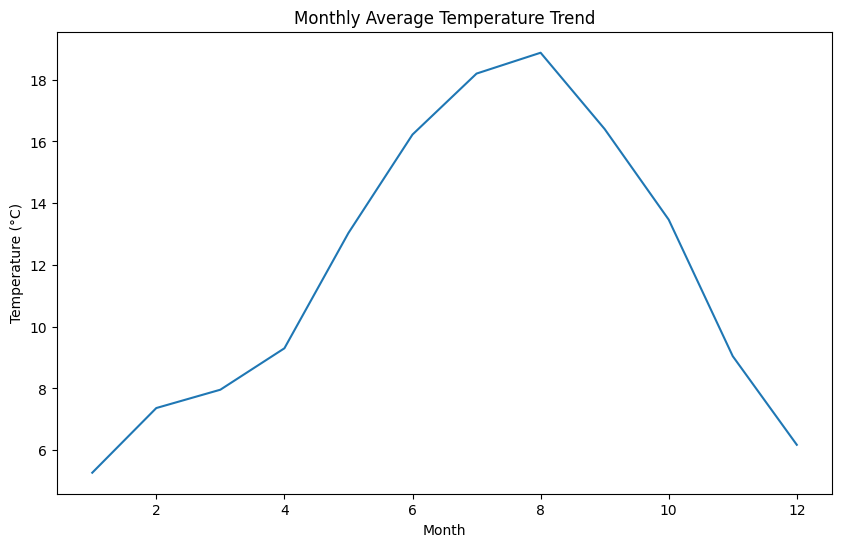

In [7]:
# Example: Plot temperature trends
plt.figure(figsize=(10, 6))
data.groupby('month')['temperature_2m'].mean().plot()
plt.title("Monthly Average Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

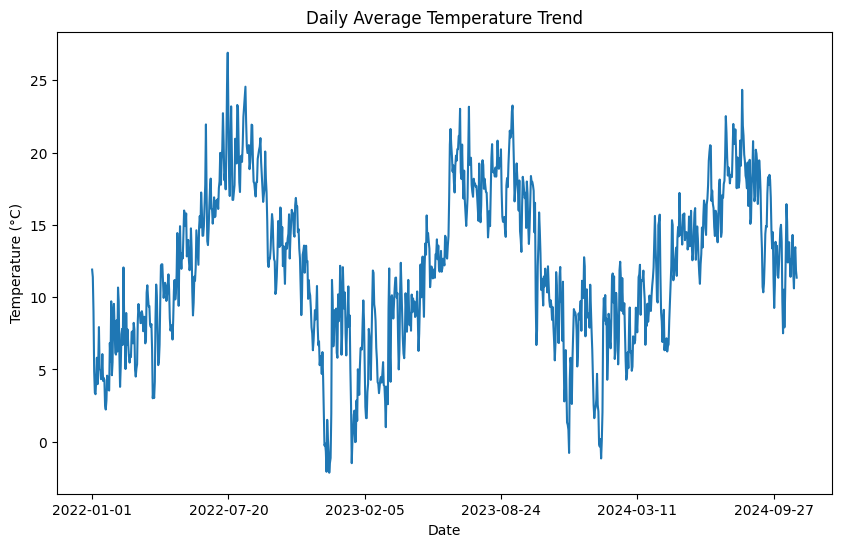

In [8]:
# Example: Plot temperature trends
plt.figure(figsize=(10, 6))
data.groupby('date')['temperature_2m'].mean().plot()
plt.title("Daily Average Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

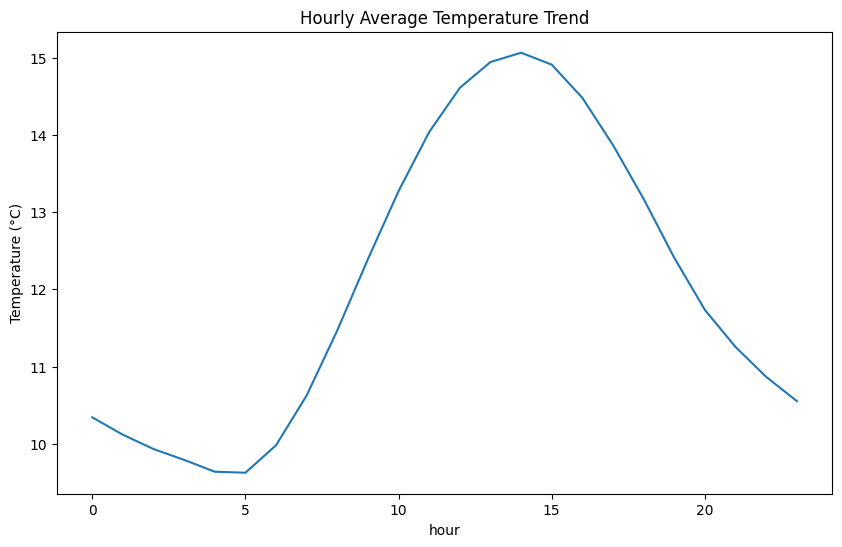

In [9]:
# Example: Plot temperature trends
plt.figure(figsize=(10, 6))
data.groupby('hour')['temperature_2m'].mean().plot()
plt.title("Hourly Average Temperature Trend")
plt.xlabel("hour")
plt.ylabel("Temperature (°C)")
plt.show()

<Figure size 1000x600 with 0 Axes>

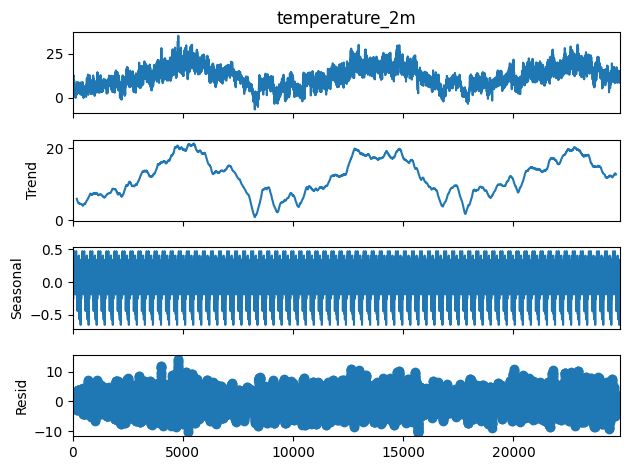

In [10]:
result = seasonal_decompose(data['temperature_2m'], model='additive', period=365)

plt.figure(figsize=(10, 6))
result.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

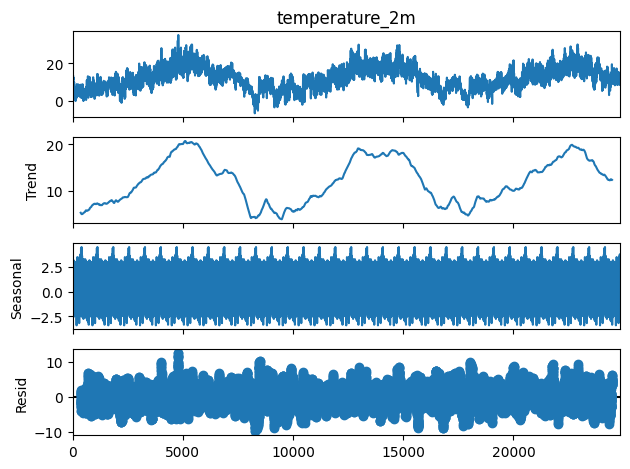

In [11]:
result = seasonal_decompose(data['temperature_2m'], model='additive', period=720)

plt.figure(figsize=(10, 6))
result.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

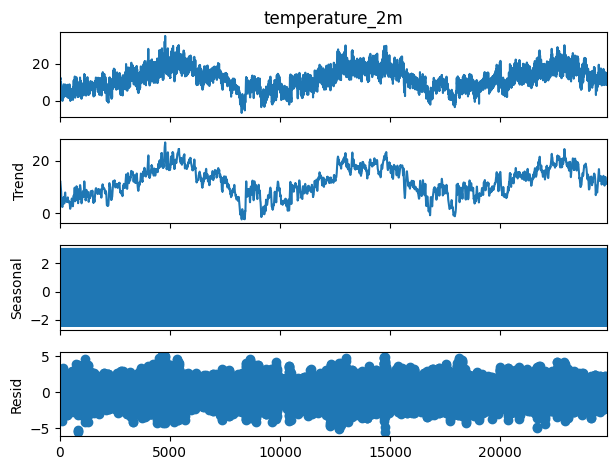

In [12]:
result = seasonal_decompose(data['temperature_2m'], model='additive', period=24)

plt.figure(figsize=(10, 6))
result.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

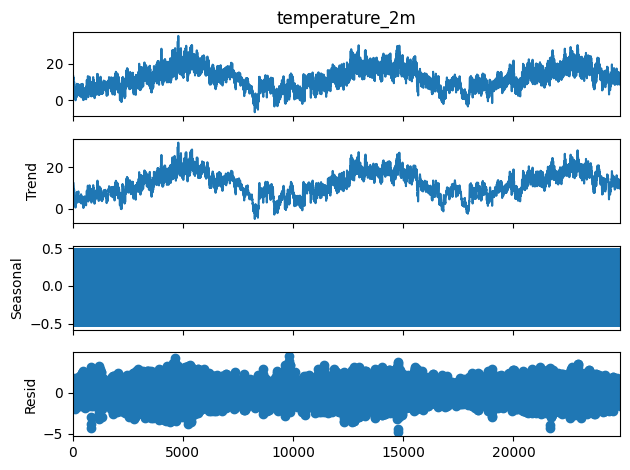

In [13]:
result = seasonal_decompose(data['temperature_2m'], model='additive', period=12)

plt.figure(figsize=(10, 6))
result.plot()
plt.show()

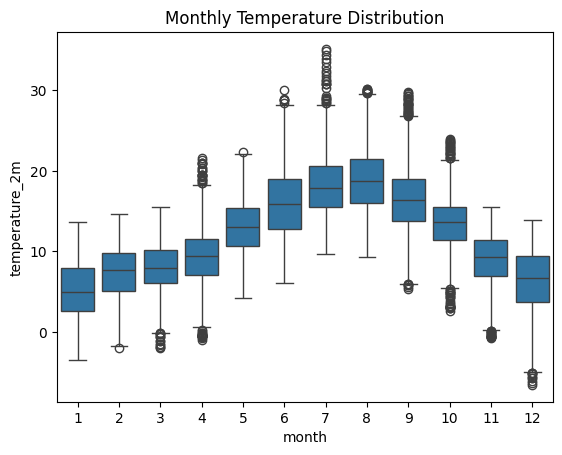

In [14]:
# Boxplot for monthly temperature distribution
sns.boxplot(x='month', y='temperature_2m', data=data)
plt.title("Monthly Temperature Distribution")
plt.show()

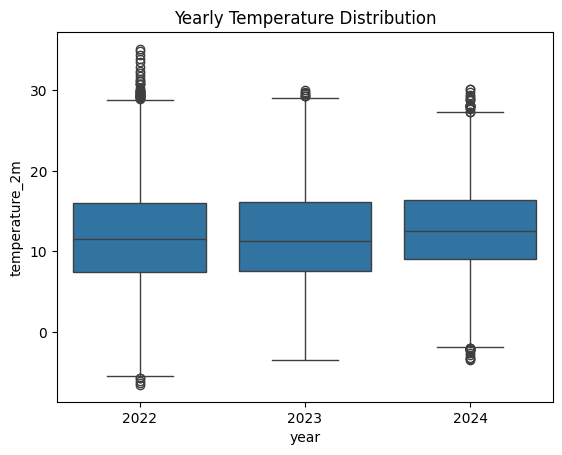

In [15]:
# Boxplot for monthly temperature distribution
sns.boxplot(x='year', y='temperature_2m', data=data)
plt.title("Yearly Temperature Distribution")
plt.show()

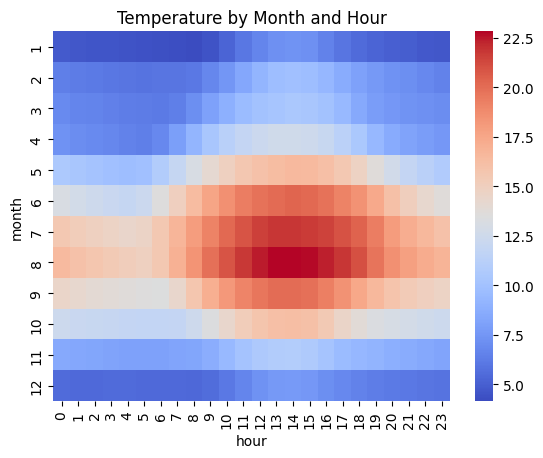

In [16]:
temp_by_hour = data.groupby(['month', 'hour'])['temperature_2m'].mean().unstack()
sns.heatmap(temp_by_hour, cmap='coolwarm')
plt.title("Temperature by Month and Hour")
plt.show()

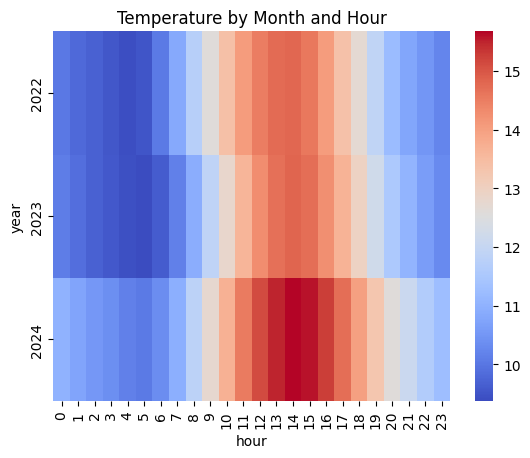

In [17]:
temp_by_hour = data.groupby(['year', 'hour'])['temperature_2m'].mean().unstack()
sns.heatmap(temp_by_hour, cmap='coolwarm')
plt.title("Temperature by Month and Hour")
plt.show()

####  Statistical Analysis

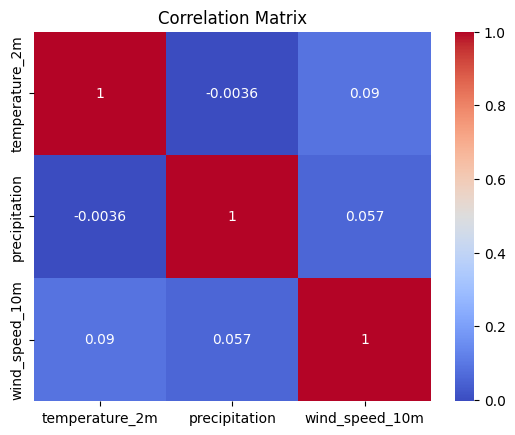

In [18]:
correlation_matrix = data[['temperature_2m', 'precipitation', 'wind_speed_10m']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [19]:
# Trend Tests
# Use statistical tests to detect trends:
# Mann-Kendall Test: Detect monotonic trends in a time series.
# t-tests/ANOVA: Compare means between seasons or years.

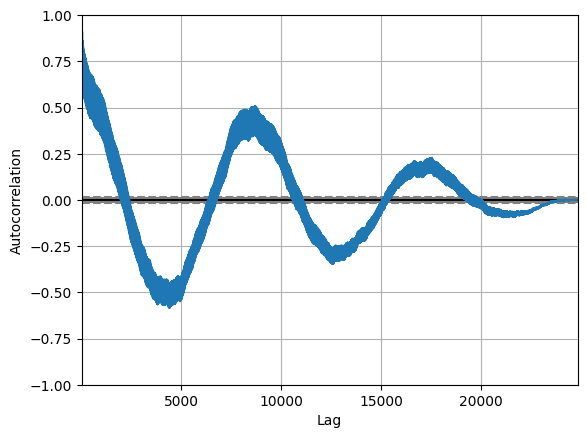

In [20]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['temperature_2m'])
plt.show()

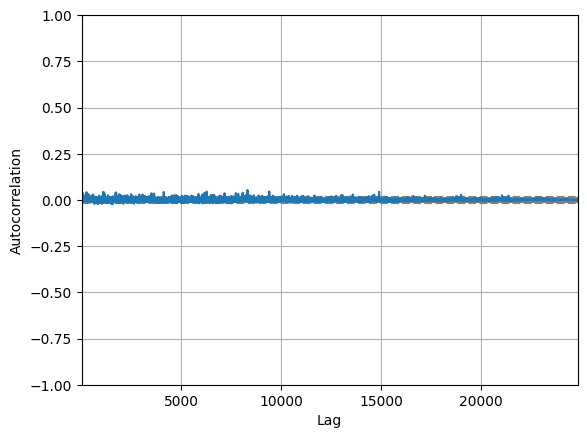

In [21]:
autocorrelation_plot(data['precipitation'])
plt.show()

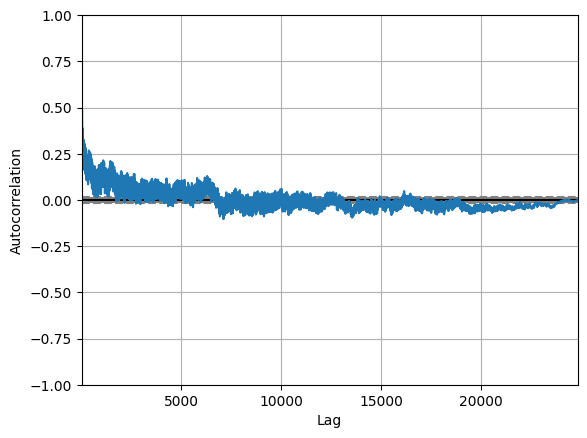

In [22]:
autocorrelation_plot(data['wind_speed_10m'])
plt.show()

#### Analyzing Seasonal Cycles

In [23]:
temp_d = data.copy()

In [24]:
temp_d['season'] = temp_d['month'] % 12 // 3 + 1
season_avg = temp_d.groupby('season')['temperature_2m'].mean()
print(season_avg)

season
1     6.245565
2    10.106760
3    17.781277
4    13.461938
Name: temperature_2m, dtype: float64


####  Long-Term Trend Analysis

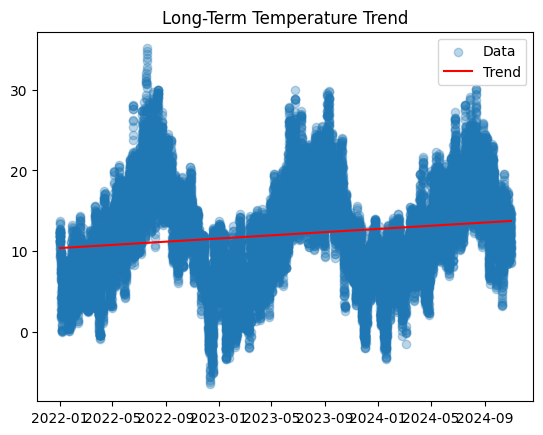

In [25]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
temp_d['date'] = pd.to_datetime(temp_d['date'])
temp_d['date_numeric'] = (temp_d['date'] - temp_d['date'].min()).dt.days
X = temp_d['date_numeric'].values.reshape(-1, 1)
y = temp_d['temperature_2m']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Plot trend
plt.scatter(temp_d['date'], y, alpha=0.3, label='Data')
plt.plot(temp_d['date'], model.predict(X), color='red', label='Trend')
plt.legend()
plt.title("Long-Term Temperature Trend")
plt.show()

#### Identify Anomalies

In [26]:
temp_d['temp_zscore'] = (temp_d['temperature_2m'] - temp_d['temperature_2m'].mean()) / temp_d['temperature_2m'].std()
anomalies = temp_d[temp_d['temp_zscore'].abs() > 3]

In [27]:
anomalies.head(2)

,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,showers,snowfall,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,year,month,day,hour,season,date_numeric,temp_zscore
4763,2022-07-18,30.7215,24.0,29.002926,0.0,0.0,0.0,0.0,1019.1,1018.06946,25.0,17.114204,165.37909,18.000000,1.0,2022,7,18,11,3,198,3.149277
4764,2022-07-18,31.1215,24.0,29.475605,0.0,0.0,0.0,0.0,1019.0,1017.97095,20.0,18.584510,158.40463,18.359999,1.0,2022,7,18,12,3,198,3.216729


In [28]:
temp_d['historical_avg'] = temp_d.groupby(['month', 'day'])['temperature_2m'].transform('mean')
anomalies = temp_d[abs(temp_d['temperature_2m'] - temp_d['historical_avg']) > 10]

In [29]:
anomalies.head(2)

,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,showers,snowfall,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,year,month,day,hour,season,date_numeric,temp_zscore,historical_avg
4645,2022-07-13,28.421501,36.0,30.449661,0.0,0.0,0.0,0.0,1020.5,1019.46020,99.0,2.741678,113.19862,12.959999,1.0,2022,7,13,13,3,193,2.761432,17.499083
4646,2022-07-13,27.521502,39.0,26.849910,0.0,0.0,0.0,0.0,1020.7,1019.65674,17.0,18.775301,94.39862,12.240000,1.0,2022,7,13,14,3,193,2.609666,17.499083


#### Clustering

In [30]:
data.head()

,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,showers,snowfall,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,year,month,day,hour
0,2022-01-01,11.021500,93.0,8.542295,0.0,0.0,0.0,0.0,1019.9,1018.79724,7.0,16.981165,212.00534,51.12,0.0,2022,1,1,0
1,2022-01-01,10.521500,95.0,8.323380,0.0,0.0,0.0,0.0,1019.7,1018.59550,19.0,14.707222,201.54105,43.56,0.0,2022,1,1,1
2,2022-01-01,10.721499,96.0,8.677092,0.0,0.0,0.0,0.0,1019.8,1018.69610,100.0,14.345898,197.52567,39.96,0.0,2022,1,1,2
3,2022-01-01,11.071500,97.0,9.138726,0.0,0.0,0.0,0.0,1019.7,1018.59784,100.0,14.587776,195.75124,42.12,0.0,2022,1,1,3
4,2022-01-01,11.221499,96.0,8.969191,0.0,0.0,0.0,0.0,1019.5,1018.39825,100.0,16.766108,194.93147,49.32,0.0,2022,1,1,4


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

temp_d = data[['temperature_2m', 'precipitation', 'rain', 'showers']]

In [32]:
# Scale the data (normalization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(temp_d)

In [33]:
import joblib
joblib.dump(scaler, 'cluster_scaler.joblib')

['cluster_scaler.joblib']

In [34]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 21)  # Test 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

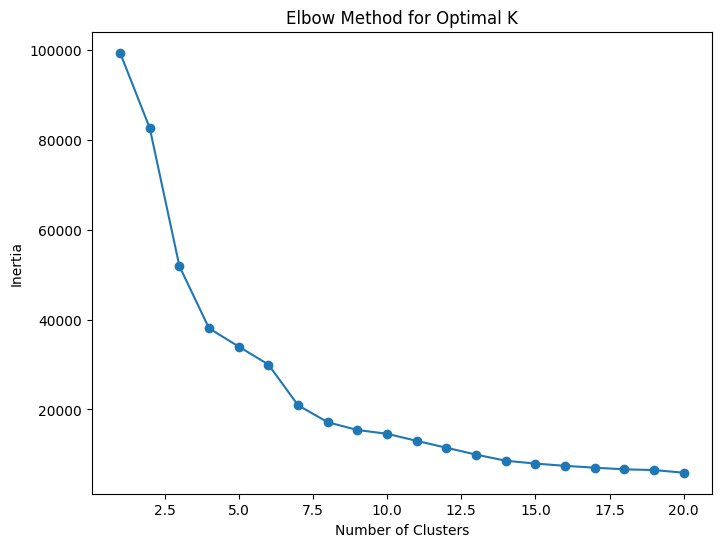

In [35]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
# Calculate Silhouette Score for the clustering
optimal_k = 5

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['cluster'] = cluster_labels

In [37]:
import joblib
joblib.dump(kmeans, 'cluster.joblib')

['cluster.joblib']

In [38]:
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f} for k: {optimal_k}")

Silhouette Score: 0.43 for k: 5


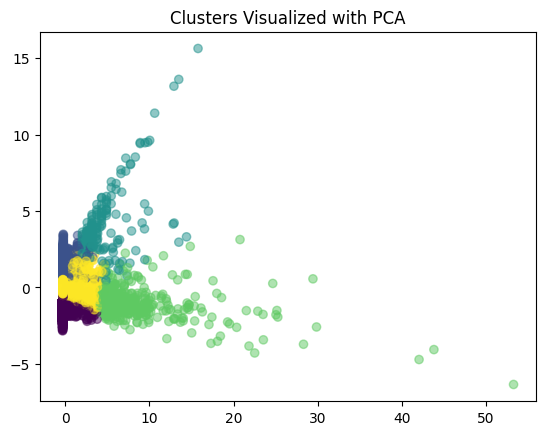

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title("Clusters Visualized with PCA")
plt.show()

In [42]:
data.head(2)

,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,showers,snowfall,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_gusts_10m,is_day,year,month,day,hour,cluster
0,2022-01-01,11.0215,93.0,8.542295,0.0,0.0,0.0,0.0,1019.9,1018.79724,7.0,16.981165,212.00534,51.12,0.0,2022,1,1,0,4
1,2022-01-01,10.5215,95.0,8.323380,0.0,0.0,0.0,0.0,1019.7,1018.59550,19.0,14.707222,201.54105,43.56,0.0,2022,1,1,1,4


In [41]:
data.to_csv('Data/processed.csv', index = False)